In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dset=pd.read_csv("/content/drive/MyDrive/House_Rent_Dataset.csv")
dset

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18-05-2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13-05-2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16-05-2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,04-07-2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,09-05-2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,18-05-2022,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,15-05-2022,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,10-07-2022,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,06-07-2022,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [ ]:
dset.shape

(4746, 12)

In [ ]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [ ]:
dset.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

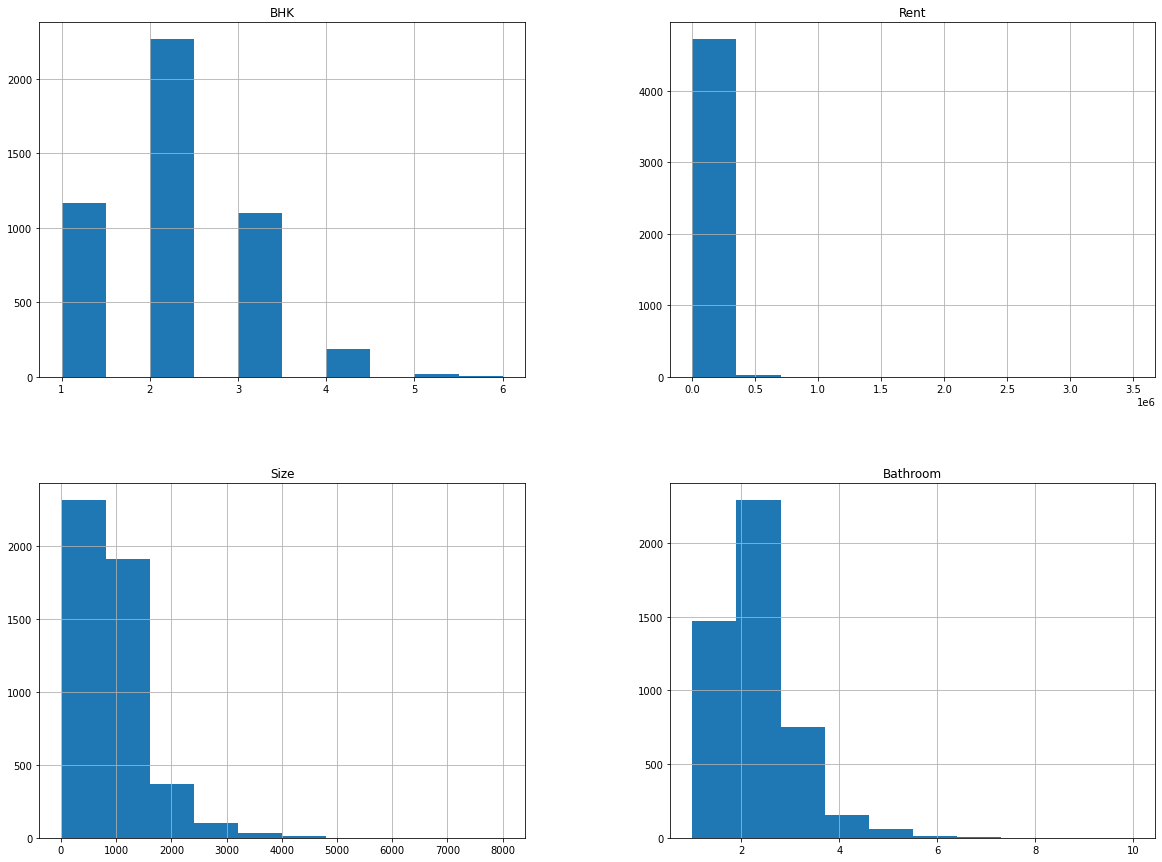

In [ ]:
freqgraph=dset.select_dtypes(include=["int32","int64","float"])
freqgraph.hist(figsize=(20,15))
plt.show()

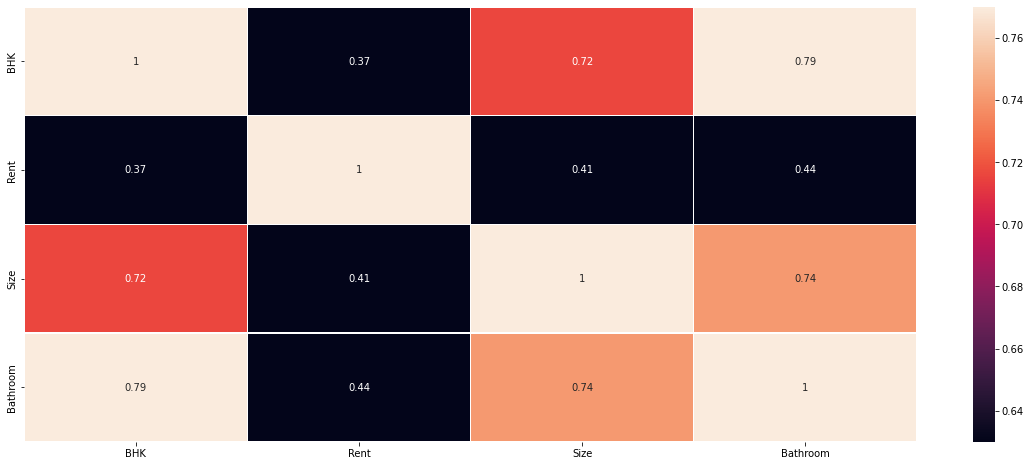

In [ ]:
corrmatrix=dset.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=.7,vmax=0.7,annot=True,linewidths=0.2)

In [ ]:
a=dset.drop(["Posted On","Floor","Area Type","Area Locality","City","Furnishing Status","Tenant Preferred","Point of Contact"],axis=1)
a.columns

Index(['BHK', 'Rent', 'Size', 'Bathroom'], dtype='object')

In [ ]:
a

,BHK,Rent,Size,Bathroom
0,2,10000,1100,2
1,2,20000,800,1
2,2,17000,1000,1
3,2,10000,800,1
4,2,7500,850,1
...,...,...,...,...
4741,2,15000,1000,2
4742,3,29000,2000,3
4743,3,35000,1750,3
4744,3,45000,1500,2


In [ ]:
y=a["Rent"]
x=a.drop(["Rent"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([38807.53869951, 32329.94343833, 26241.00389281, ...,
       83104.85930331, 30170.74501793,  3578.85146136])

In [ ]:
x=int(input("BHK"))

z=int(input("Size"))
b=int(input("Bathroom"))
a=pd.DataFrame({"BHK":[x],
                "Size":[z],
                "Bathroom":[b]})
a

BHK2
Size1100
Bathroom2


,BHK,Size,Bathroom
0,2,1100,2


In [ ]:
y_pred=lr.predict(a)
y_pred

array([38807.53869951])